Play Store App Analysis

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
apps_data = pd.read_csv("Play Store Data.csv")
user_reviews = pd.read_csv("User Reviews.csv")

In [19]:
apps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [21]:
user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [22]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


cleaning

1. removing null values

In [23]:
apps_data.isna()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
apps_data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [25]:
apps_data.dropna(subset='Rating')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [26]:
apps_data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [27]:
apps_data = apps_data.dropna(axis=0, subset='Rating')

In [28]:
apps_data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [29]:
new_apps_data = apps_data

In [30]:
new_apps_data.dropna(axis=0, subset=['Content Rating', 'Current Ver', 'Android Ver'], inplace=True)
#new_apps_data.isna().sum()


In [31]:
new_apps_data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [32]:
apps_data = new_apps_data

In [33]:
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


2. removing '+' and converting the 'Installs' column to int 

In [34]:
new_apps = apps_data

In [35]:
new_apps['Installs'] = new_apps['Installs'].astype(str)

In [36]:
new_apps['Installs'] = new_apps['Installs'].str[:-1]

In [37]:
new_apps['Installs']

0            10,000
1           500,000
2         5,000,000
3        50,000,000
4           100,000
            ...    
10834           500
10836         5,000
10837           100
10839         1,000
10840    10,000,000
Name: Installs, Length: 9360, dtype: object

In [38]:
new_apps['Installs'] = new_apps['Installs'].map(lambda x: x.replace(',' , ''))

In [39]:
new_apps['Installs'] = new_apps['Installs'].astype(int)

In [40]:
apps_data['Installs'] = new_apps['Installs']

In [41]:
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   int32  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), int32(1), object(11)
memory usage: 987.2+ KB


3. converting reviews column to int

In [42]:
new_apps['Reviews'] = new_apps['Reviews'].astype(int)

In [43]:
apps_data['Reviews'] = new_apps['Reviews']

4. fixing size column -> making the column int

In [44]:
new_apps = apps_data

removing "varies with device"

In [45]:
"Varies with device" in new_apps['Size'].unique()

True

In [47]:
new_apps['Size'].astype(str)

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 9360, dtype: object

In [48]:
new_apps = new_apps[new_apps.Size != "Varies with device"]

In [50]:
"Varies with device" in new_apps['Size'].unique()

False

In [51]:
new_apps['Size'] = new_apps['Size'].str.replace(',', '')

C:\Users\WISDOM\AppData\Local\Temp\ipykernel_17228\3083107588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_apps['Size'] = new_apps['Size'].str.replace(',', '')


In [52]:
def convert_k_to_m(x):
    y = x[:-1]
    val = float(y)
    if x[-1] == 'k' :
        val /= 1000
    x = val
    return x

In [53]:
new_apps['Size'] = new_apps['Size'].apply(lambda x : convert_k_to_m(x) )

C:\Users\WISDOM\AppData\Local\Temp\ipykernel_17228\2416029357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_apps['Size'] = new_apps['Size'].apply(lambda x : convert_k_to_m(x) )


In [54]:
new_apps['Size'].unique()

array([1.90e+01, 1.40e+01, 8.70e+00, 2.50e+01, 2.80e+00, 5.60e+00,
       2.90e+01, 3.30e+01, 3.10e+00, 2.80e+01, 1.20e+01, 2.00e+01,
       2.10e+01, 3.70e+01, 5.50e+00, 1.70e+01, 3.90e+01, 3.10e+01,
       4.20e+00, 2.30e+01, 6.00e+00, 6.10e+00, 4.60e+00, 9.20e+00,
       5.20e+00, 1.10e+01, 2.40e+01, 9.40e+00, 1.50e+01, 1.00e+01,
       1.20e+00, 2.60e+01, 8.00e+00, 7.90e+00, 5.60e+01, 5.70e+01,
       3.50e+01, 5.40e+01, 2.01e-01, 3.60e+00, 5.70e+00, 8.60e+00,
       2.40e+00, 2.70e+01, 2.70e+00, 2.50e+00, 7.00e+00, 1.60e+01,
       3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+01, 3.20e+01,
       5.40e+00, 1.80e+01, 1.10e+00, 2.20e+00, 4.50e+00, 9.80e+00,
       5.20e+01, 9.00e+00, 6.70e+00, 3.00e+01, 2.60e+00, 7.10e+00,
       2.20e+01, 6.40e+00, 3.20e+00, 8.20e+00, 4.90e+00, 9.50e+00,
       5.00e+00, 5.90e+00, 1.30e+01, 7.30e+01, 6.80e+00, 3.50e+00,
       4.00e+00, 2.30e+00, 2.10e+00, 4.20e+01, 9.10e+00, 5.50e+01,
       2.30e-02, 7.30e+00, 6.50e+00, 1.50e+00, 7.50e+00, 5.10e

In [55]:
apps_data = new_apps

removing duplicates

In [57]:
new_apps = new_apps.drop_duplicates(keep='first')

In [58]:
apps_data = new_apps

CLEANING USER REVIEWS DATASET

In [39]:
user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [40]:
ur_temp = user_reviews

1. removing null values

In [41]:
ur_temp = ur_temp.dropna(subset="Translated_Review")

In [42]:
ur_temp['Translated_Review'].isna().sum()

0

2. Removing duplicates

In [43]:
df2 = ur_temp[ur_temp.duplicated()]
df2

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
78,10 Best Foods for You,Good,Positive,0.700000,0.600000
79,10 Best Foods for You,Good,Positive,0.700000,0.600000
100,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
101,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
103,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
...,...,...,...,...,...
64071,Hotels.com: Book Hotel Rooms & Find Vacation D...,Made account using Google account. No option G...,Negative,-0.500000,0.500000
64073,Hotels.com: Book Hotel Rooms & Find Vacation D...,The new system showing Top 10 whole search res...,Negative,-0.032727,0.670909
64075,Hotels.com: Book Hotel Rooms & Find Vacation D...,Mobile currently crashing. Their international...,Neutral,0.000000,0.200000
64113,Hotspot Shield Free VPN Proxy & Wi-Fi Security,Good,Positive,0.700000,0.600000


MAKING INFERENCES

App Distribution by category

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
pi_df = apps_data.groupby('Category')['App'].count().reset_index(name="count")

In [46]:
pi_df

,Category,count
0,ART_AND_DESIGN,58
1,AUTO_AND_VEHICLES,63
2,BEAUTY,37
3,BOOKS_AND_REFERENCE,143
4,BUSINESS,225
5,COMICS,49
6,COMMUNICATION,206
7,DATING,141
8,EDUCATION,95
9,ENTERTAINMENT,67


In [47]:
import plotly.express as px

fig = px.pie(pi_df, values='count', names='Category', title='Distribution of Apps by Category ')
fig.show()

Average rating of apps (overall)

In [48]:
apps_data['Rating'].mean()

4.1713939067134

In [49]:
fig = px.histogram(apps_data, x="Rating")
fig.show()

C- most apps have a rating just a little less than 4.5

looking closely at each category
-distribution or ratings in each category

In [206]:
fig = px.violin(apps_data, x='Category', y='Rating')
fig.show()

C - BOOKS_AN_REFERENCE and HEALTH_AND_FITNESS have the highest rated apps

are lighter apps better rated?

In [74]:
fig = px.scatter(apps_data, x='Size', y='Rating', color='Type')
fig.show()

C - most apps lie in the range of 0-10MB range

C - most paid apps are light weight

Are paid apps better than free apps ?


In [61]:
df = apps_data

making the price column's data type right

In [62]:
df['Price'] = df['Price'].apply(lambda x: str(x))

In [63]:
def remove_doller(x) :
    if x[0] == '$' : 
        x = x[1:]
    return x

In [64]:
df['Price'] = df['Price'].apply(lambda x : remove_doller(x))

In [65]:
df['Price'] = df['Price'].astype(float)

In [66]:
df['Price'].isna().sum()

0

In [67]:
apps_data = df

visualising the distribution between price and ratings


In [68]:
fig = px.scatter(apps_data, x='Price', y='Rating')
fig.show()

C - most apps lie in 0-$20 range

we can see that there are some apps that are very expensive, let's see what are those

In [69]:
apps_data[apps_data['Price'] > 100]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1.500,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.000,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.800,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8.700,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2.600,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.700,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.900,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22.000,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,0.965,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


let's remove them from our dataset

In [70]:
df = apps_data

In [71]:
df.drop(df[df['Price'] >= 100].index, inplace = True)

In [72]:
apps_data = df

In [73]:
apps_data[apps_data['Price'] > 100]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


removed!

Distribution of paid and free apps across categories

In [82]:
df = apps_data

In [85]:
df.groupby('Category')['App']
#.count().reset_index(name="count")

In [80]:
df.groupby('Category').agg(
    Sum=('returns', np.sum),
    count=('returns', np.count))

In [81]:
df

,Category,Price,count
0,ART_AND_DESIGN,0.00,55
1,ART_AND_DESIGN,1.99,3
2,AUTO_AND_VEHICLES,0.00,63
3,BEAUTY,0.00,37
4,BOOKS_AND_REFERENCE,0.00,136
...,...,...,...
223,WEATHER,1.99,1
224,WEATHER,2.99,2
225,WEATHER,3.99,1
226,WEATHER,4.49,1


In [ ]:
px.plot(x='Category', y='count')

adding a new column to user_reviews

In [87]:
df_r = user_reviews
df_d = apps_data

In [ ]:
df_r['Category'] = df_d['Category']

distribution of paid and free across each category

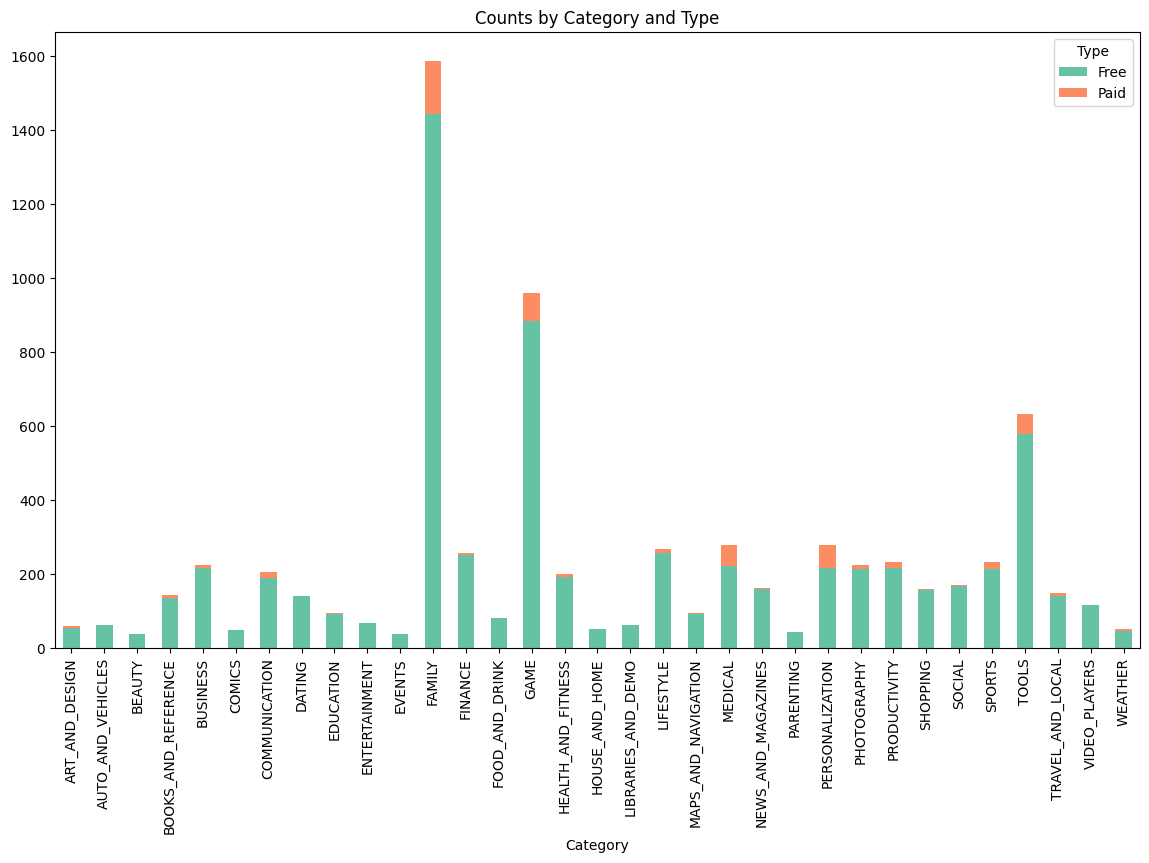

In [220]:
sns.set_palette("Set2")
counts = apps_data.groupby(['Category', 'Type']).size().unstack()
counts.fillna(0, inplace=True)
counts = counts.astype(int)
ax = counts.plot(kind='bar', stacked=True, figsize=(14,8), title='Counts by Category and Type')


Exploring correlations

In [78]:
df = apps_data[['Rating', 'Reviews', 'Size', 'Installs', 'Price']]

In [79]:
corr = df.corr()

<AxesSubplot:>

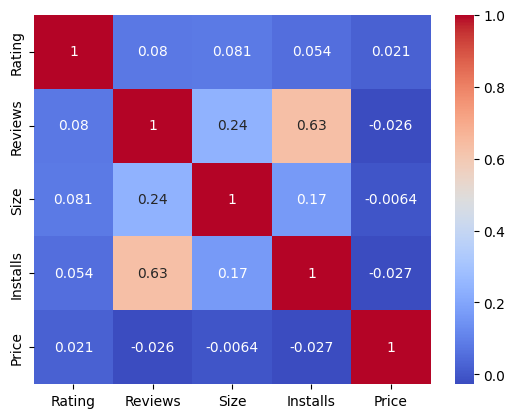

In [85]:
sns.heatmap(corr, cmap='coolwarm', annot=True)

C - we can see that reviews and number of installs have high correlation

Sentiment Analysis - User reviews across each category

-removing duplicates from reviews

In [155]:
df = user_reviews.drop_duplicates(keep='first')
user_reviews = df

In [156]:
merged_df = pd.merge(user_reviews, apps_data[['App', 'Category']], on='App', how='left')

In [207]:
merged_df = merged_df.dropna()
merged_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,HEALTH_AND_FITNESS
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,HEALTH_AND_FITNESS
...,...,...,...,...,...,...
37895,Hotspot Shield Free VPN Proxy & Wi-Fi Security,FORTNITE,Neutral,0.00,0.000000,TOOLS
37896,Hotspot Shield Free VPN Proxy & Wi-Fi Security,Thinks,Neutral,0.00,0.000000,TOOLS
37897,Hotspot Shield Free VPN Proxy & Wi-Fi Security,Love It,Positive,0.50,0.600000,TOOLS
37898,Hotspot Shield Free VPN Proxy & Wi-Fi Security,really great,Positive,0.80,0.750000,TOOLS


In [212]:
df = merged_df.groupby(['Category', 'Sentiment']).size().unstack()
df.fillna(0, inplace=True)
df

Sentiment,Negative,Neutral,Positive
Category,,,
ART_AND_DESIGN,51.0,52.0,214.0
AUTO_AND_VEHICLES,11.0,20.0,131.0
BEAUTY,52.0,76.0,153.0
BOOKS_AND_REFERENCE,23.0,52.0,198.0
BUSINESS,88.0,97.0,314.0
COMICS,0.0,4.0,6.0
COMMUNICATION,72.0,78.0,334.0
DATING,256.0,225.0,790.0
EDUCATION,58.0,73.0,360.0


In [213]:
df['total'] = df['Positive'] + df['Negative'] + df['Neutral']


In [214]:
df['pos_pct'] = df['Positive'] / df['total'] * 100
df['neg_pct'] = df['Negative'] / df['total'] * 100
df['neu_pct'] = df['Neutral'] / df['total'] * 100
df

Sentiment,Negative,Neutral,Positive,total,pos_pct,neg_pct,neu_pct
Category,,,,,,,
ART_AND_DESIGN,51.0,52.0,214.0,317.0,67.507886,16.088328,16.403785
AUTO_AND_VEHICLES,11.0,20.0,131.0,162.0,80.864198,6.790123,12.345679
BEAUTY,52.0,76.0,153.0,281.0,54.448399,18.505338,27.046263
BOOKS_AND_REFERENCE,23.0,52.0,198.0,273.0,72.527473,8.424908,19.047619
BUSINESS,88.0,97.0,314.0,499.0,62.925852,17.635271,19.438878
COMICS,0.0,4.0,6.0,10.0,60.000000,0.000000,40.000000
COMMUNICATION,72.0,78.0,334.0,484.0,69.008264,14.876033,16.115702
DATING,256.0,225.0,790.0,1271.0,62.155783,20.141621,17.702596
EDUCATION,58.0,73.0,360.0,491.0,73.319756,11.812627,14.867617


c:\Users\WISDOM\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



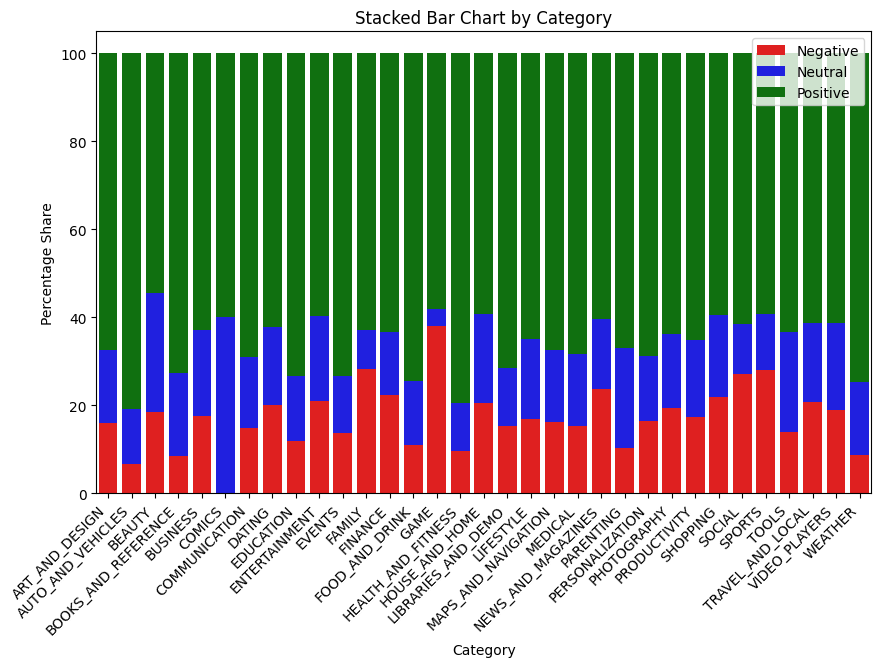

In [215]:

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=df.index, y=df['neg_pct'], color='r', label='Negative')
sns.barplot(x=df.index, y=df['neu_pct'], color='b', bottom=df['neg_pct'], label='Neutral')
sns.barplot(x=df.index, y=df['pos_pct'], color='g', bottom=df['neg_pct']+df['neu_pct'], label='Positive')
ax.set_xticklabels(df.index, rotation=45, ha='right')
ax.set_ylabel('Percentage Share')
ax.set_title('Stacked Bar Chart by Category')
ax.legend()

# Show the chart
plt.show()


C - AUTO_AND_VEHICLES and HEALTH_AND_FITNESS receive the most positive reviews. Whereas GAMES receive the most negative reviews

Visualising sentiment polarity distribution across paid and free apps

In [218]:
df = pd.merge( user_reviews, apps_data[['App', 'Type']], on='App', how='left')
df = df.dropna()
df = df.drop_duplicates()
df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Type
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,Free
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,Free
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,Free
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,Free
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,Free
...,...,...,...,...,...,...
37895,Hotspot Shield Free VPN Proxy & Wi-Fi Security,FORTNITE,Neutral,0.00,0.000000,Free
37896,Hotspot Shield Free VPN Proxy & Wi-Fi Security,Thinks,Neutral,0.00,0.000000,Free
37897,Hotspot Shield Free VPN Proxy & Wi-Fi Security,Love It,Positive,0.50,0.600000,Free
37898,Hotspot Shield Free VPN Proxy & Wi-Fi Security,really great,Positive,0.80,0.750000,Free


<AxesSubplot:xlabel='Type', ylabel='Sentiment_Polarity'>

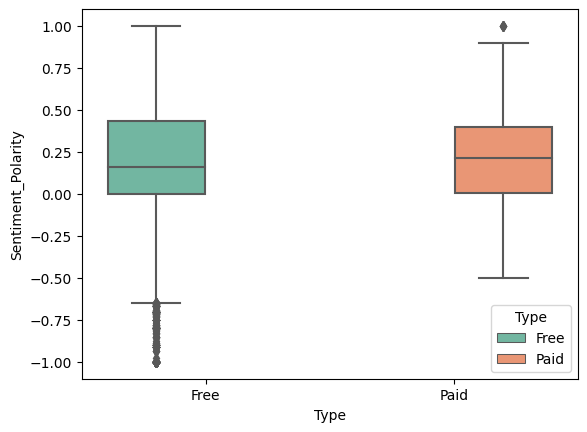

In [219]:
sns.set_palette("Set2")
sns.boxplot(x='Type', y='Sentiment_Polarity', data=df, hue='Type')

C - we can see that the free apps receive more harsh reviews as compared to paid apps